# Лабораторная работа 3. Классификация. Нейронные сети
**Цель работы:** изучение методов классификации данных, реализованные в библиотеке Scikit-Learn, а также ознакомление с нейронными сетями с использованием библиотек TensorFlow и TensorBoard.

**Датасет:** https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

**Описание:** 

Заболевания сердечно-сосудистой системы (ССЗ) являются основной причиной смерти в мире: ежегодно они уносят около 17,9 миллионов человеческих жизней, что составляет 31% всех смертей в мире. Четыре из пяти смертей от ССЗ происходят из-за инфарктов и инсультов, и одна треть этих случаев смерти происходит преждевременно, среди людей в возрасте до 70 лет. Сердечная недостаточность - это распространенное последствие ССЗ, и представленный набор данных содержит 11 признаков, которые можно использовать для прогнозирования возможного заболевания сердца.

| **Переменная** | **Описание** |
| :---: | :--- |
| **Age** | Возраст пациента [годы] |
| **Sex** | Пол пациента [M: мужской, F: женский] |
| **ChestPainType** | Тип боли в груди [TA: Типичная стенокардия, ATA: Атипичная стенокардия, NAP: Неангинальная боль, ASY: Бессимптомное течение] |
| **RestingBP** | Артериальное давление в состоянии покоя [мм рт. ст.] |
| **Cholesterol** | Уровень холестерина в сыворотке крови [мм/дл] |
| **FastingBS** | Уровень сахара в крови натощак [1: если FastingBS > 120 мг/дл, 0: в противном случае] |
| **RestingECG** | Результаты электрокардиографии в состоянии покоя [Normal: нормальная, ST: наличие аномалии зубца ST-T (инверсии зубца T и/или подъем или депрессия сегмента ST > 0.05 мВ), LVH: признаки вероятной или определенной гипертрофии левого желудочка по критериям Эстеса] |
| **MaxHR** | Максимальная достигнутая частота сердечных сокращений [числовое значение от 60 до 202] |
| **ExerciseAngina** | Стенокардия, вызванная физической нагрузкой [Y: да, N: нет] |
| **Oldpeak** | Величина депрессии сегмента ST [числовое значение, измеряется в депрессии] |
| **ST_Slope** | Наклон сегмента ST при пиковой нагрузке [Up: восходящий, Flat: плоский, Down: нисходящий] |
| **HeartDisease** | Целевой класс [1: заболевание сердца, 0: норма] |

---

## Загрузка датасета и подготовка данных

In [59]:
import pandas as pd

df = pd.read_csv('..\datasets\heart.csv')

print(df)
print(df.info())

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N  

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Artur\AppData\Local\Temp\ipykernel_2520\19163273.py:3: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv('..\datasets\heart.csv')



---

### Оценка распределения классов:

In [60]:
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

Классы относительно сбалансированны (примерно в соотношении 55/45).

---

### Анализ переменных:

- **Числовые:** Age, RestingBP, Cholesterol, MaxHR, Oldpeak;
- **Категориальные:** Sex, ChestPainType, RestingECG, ExcerciseAngina, ST_Slope;
- **Бинарные:** FastingBS, HeartDisease (целевая).

Категориальные переменные необходимо закодировать, чтобы модели могли работать с этими данными, но т.к. модели могут ошибочно интерпретировать числа как упорядоченные, необходимо для каждого метода использовать предпочтительный вариант кодирования.

Также для некоторых методов необходимо масштабирование данных.

---

### Кодирование категориальных переменных

In [61]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

onehot_encoder  = OneHotEncoder(drop='first', sparse_output=False) # first, чтобы избежать dummy trap.
encoded_data = onehot_encoder .fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded_data, columns=onehot_encoder .get_feature_names_out(categorical_cols))

df_onehot = pd.concat([df[numerical_cols], encoded_df, df['HeartDisease']], axis=1)

print(df_onehot)

     Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  Sex_M  \
0     40        140          289          0    172      0.0    1.0   
1     49        160          180          0    156      1.0    0.0   
2     37        130          283          0     98      0.0    1.0   
3     48        138          214          0    108      1.5    0.0   
4     54        150          195          0    122      0.0    1.0   
..   ...        ...          ...        ...    ...      ...    ...   
913   45        110          264          0    132      1.2    1.0   
914   68        144          193          1    141      3.4    1.0   
915   57        130          131          0    115      1.2    1.0   
916   57        130          236          0    174      0.0    0.0   
917   38        138          175          0    173      0.0    1.0   

     ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
0                  1.0                0.0               0.0   
1                  0.0           

In [62]:
from sklearn.preprocessing import LabelEncoder

df_label = df.copy()
label_encoders = {}

for col in categorical_cols:
    label_encoder = LabelEncoder()
    df_label[col] = label_encoder.fit_transform(df_label[col])
    label_encoders[col] = label_encoder

df_label = pd.concat([df_label[numerical_cols + categorical_cols], df_label['HeartDisease']], axis=1)

print(df_label)

     Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  Sex  \
0     40        140          289          0    172      0.0    1   
1     49        160          180          0    156      1.0    0   
2     37        130          283          0     98      0.0    1   
3     48        138          214          0    108      1.5    0   
4     54        150          195          0    122      0.0    1   
..   ...        ...          ...        ...    ...      ...  ...   
913   45        110          264          0    132      1.2    1   
914   68        144          193          1    141      3.4    1   
915   57        130          131          0    115      1.2    1   
916   57        130          236          0    174      0.0    0   
917   38        138          175          0    173      0.0    1   

     ChestPainType  RestingECG  ExerciseAngina  ST_Slope  HeartDisease  
0                1           1               0         2             0  
1                2           1       

In [63]:
for col in categorical_cols:
    le = label_encoders[col]
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(f"Столбец '{col}':")
    for category, code in mapping.items():
        print(f"  {category} -> {code}")
    print()

Столбец 'Sex':
  F -> 0
  M -> 1

Столбец 'ChestPainType':
  ASY -> 0
  ATA -> 1
  NAP -> 2
  TA -> 3

Столбец 'RestingECG':
  LVH -> 0
  Normal -> 1
  ST -> 2

Столбец 'ExerciseAngina':
  N -> 0
  Y -> 1

Столбец 'ST_Slope':
  Down -> 0
  Flat -> 1
  Up -> 2




---

### Масштабирование числовых признаков

**LDA**, **SVM**, **k-NN** и **нейросети** чувстительны к масштабу признаков, поэтому масштабируем данные для них (используем One-Hot кодирование).

In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_onehot_scaled = df_onehot.copy()
df_onehot_scaled[numerical_cols] = scaler.fit_transform(df_onehot_scaled[numerical_cols])

print(df_onehot_scaled)

          Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  Sex_M  \
0   -1.433140   0.410909     0.825070  -0.551341  1.382928 -0.832432    1.0   
1   -0.478484   1.491752    -0.171961  -0.551341  0.754157  0.105664    0.0   
2   -1.751359  -0.129513     0.770188  -0.551341 -1.525138 -0.832432    1.0   
3   -0.584556   0.302825     0.139040  -0.551341 -1.132156  0.574711    0.0   
4    0.051881   0.951331    -0.034755  -0.551341 -0.581981 -0.832432    1.0   
..        ...        ...          ...        ...       ...       ...    ...   
913 -0.902775  -1.210356     0.596393  -0.551341 -0.188999  0.293283    1.0   
914  1.536902   0.627078    -0.053049   1.813758  0.164684  2.357094    1.0   
915  0.370100  -0.129513    -0.620168  -0.551341 -0.857069  0.293283    1.0   
916  0.370100  -0.129513     0.340275  -0.551341  1.461525 -0.832432    0.0   
917 -1.645286   0.302825    -0.217696  -0.551341  1.422226 -0.832432    1.0   

     ChestPainType_ATA  ChestPainType_NAP  ChestPai


---

## 1. Построение класификационной модели с помощью **Наивного Байесовского классификатора**

### Проверка данных на соответствование требованиям методов

Проверим признаки на соответствие **нормальному распределению**:

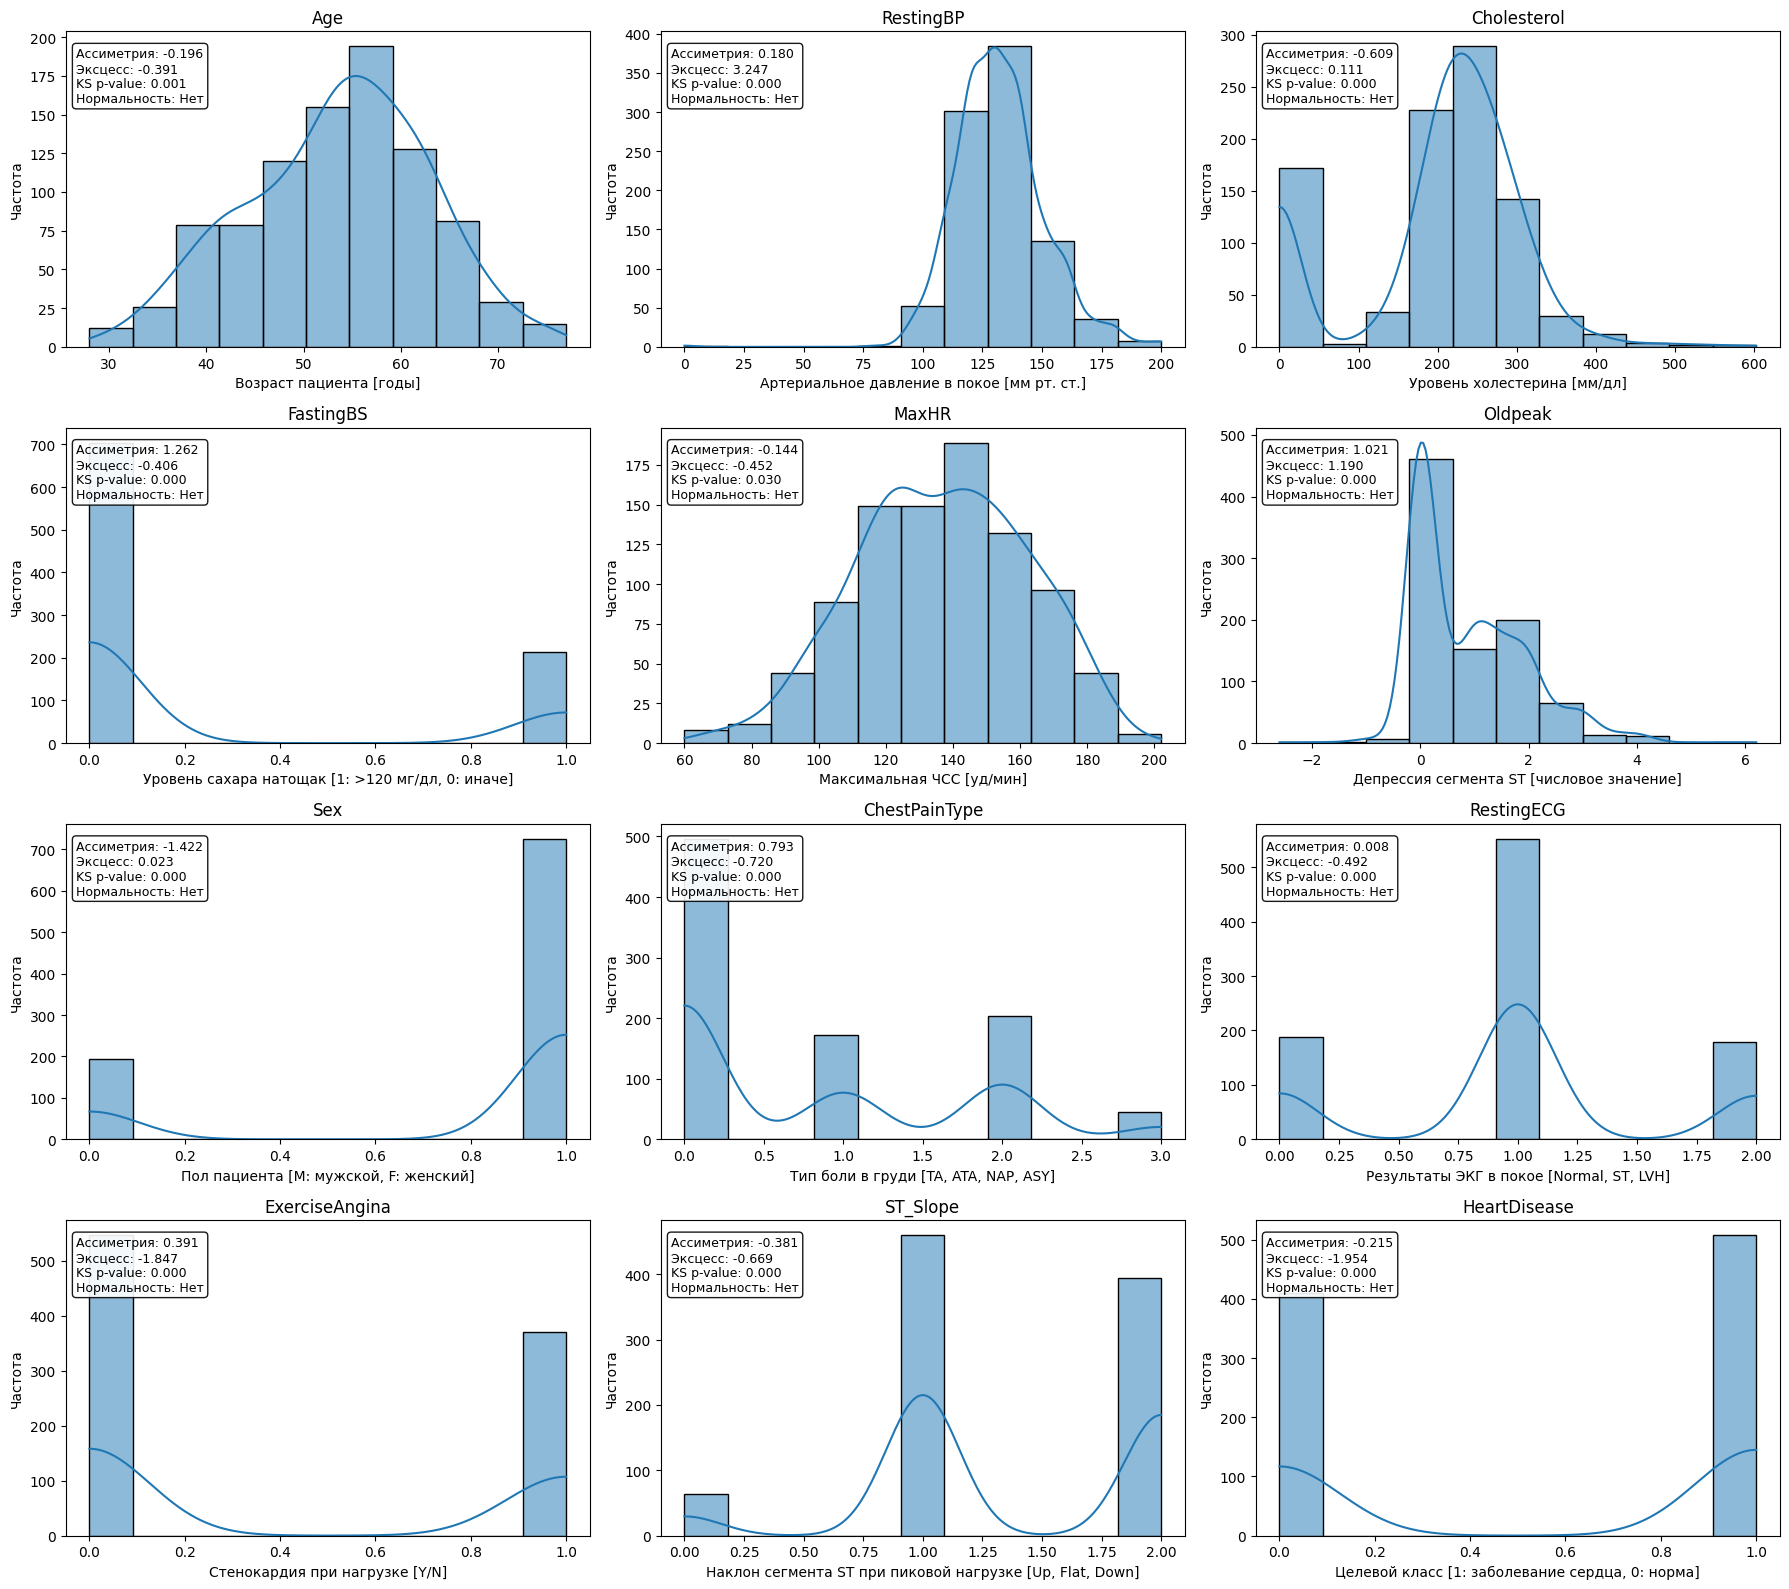

In [65]:
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sb
from scipy.stats import skew, kurtosis, kstest

ALPHA = 0.05

# Описание переменных
descriptions = {
    'Age': 'Возраст пациента [годы]',
    'Sex': 'Пол пациента [M: мужской, F: женский]',
    'ChestPainType': 'Тип боли в груди [TA, ATA, NAP, ASY]',
    'RestingBP': 'Артериальное давление в покое [мм рт. ст.]',
    'Cholesterol': 'Уровень холестерина [мм/дл]',
    'FastingBS': 'Уровень сахара натощак [1: >120 мг/дл, 0: иначе]',
    'RestingECG': 'Результаты ЭКГ в покое [Normal, ST, LVH]',
    'MaxHR': 'Максимальная ЧСС [уд/мин]',
    'ExerciseAngina': 'Стенокардия при нагрузке [Y/N]',
    'Oldpeak': 'Депрессия сегмента ST [числовое значение]',
    'ST_Slope': 'Наклон сегмента ST при пиковой нагрузке [Up, Flat, Down]',
    'HeartDisease': 'Целевой класс [1: заболевание сердца, 0: норма]'
}

num_cols = 3
num_rows = int(np.ceil(len(df_label.columns) / num_cols))

fig, axes = plot.subplots(num_rows, num_cols, figsize=(18, num_rows * 4))
axes = axes.flatten()

for i, column in enumerate(df_label.columns):
    ax = axes[i]
    
    sb.histplot(df_label[column], kde=True, bins='sturges', ax=ax)
    
    ks_stat, ks_p_value = kstest(df_label[column], 'norm', args=(np.mean(df_label[column]), np.std(df_label[column])))
    
    legend_text = (
        f'Ассиметрия: {skew(df_label[column]):.3f}\n'
        f'Эксцесс: {kurtosis(df_label[column]):.3f}\n'
        f'KS p-value: {ks_p_value:.3f}\n'
        f'Нормальность: {"Да" if ks_p_value >= ALPHA else "Нет"}'
    )
    
    ax.text(0.02, 0.95, legend_text, transform=ax.transAxes, fontsize=9,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', edgecolor='black', alpha=0.9))
    
    ax.set_title(column)
    ax.set_xlabel(descriptions[column])
    ax.set_ylabel('Частота')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plot.tight_layout()
plot.show()


По полученным данным видно, что признаки не соответсвтуют нормальному распределению. Следовательно, **GaussianNB не подходит**.

- MultinomialNB - для дискретных неотриц. признаков.
- ComplementNB - вариация MultinomialNB, корректирующая несбалансированные классы.
- BernoulliNB - для бинарных признаков.

Т.к. в датасете есть как дискретные, так и числовые признки, то **BernoulliNB тоже не подходит**; **ComplementNB** используется в случае, когда классы сильно несбалансированны - в нашем случае эффект будет минимальным, поэтому воспользуемся **MultinomialNB**.

Для его применения необходимо привести числовые (непрерывные) признаки к дискретным.

---

### Приведение числовых признаков к дискретным

In [66]:
from sklearn.preprocessing import KBinsDiscretizer

df_label_disc = df_label.copy()

kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
df_label_disc[numerical_cols] = kbins.fit_transform(df_label_disc[numerical_cols]).astype(int)

df_multinomial = pd.concat([df_label_disc[numerical_cols + categorical_cols], df_label_disc['HeartDisease']], axis=1)

print(df_multinomial)

     Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  Sex  \
0      2          7            4          0      7        2    1   
1      4          8            2          0      6        4    0   
2      1          6            4          0      2        2    1   
3      4          6            3          0      3        4    0   
4      5          7            3          0      4        2    1   
..   ...        ...          ...        ...    ...      ...  ...   
913    3          5            4          0      5        4    1   
914    8          7            3          9      5        6    1   
915    5          6            2          0      3        4    1   
916    5          6            3          0      8        2    0   
917    2          6            2          0      7        2    1   

     ChestPainType  RestingECG  ExerciseAngina  ST_Slope  HeartDisease  
0                1           1               0         2             0  
1                2           1       

Теперь можно приступить к построению модели.

---

### Построение модели MultinomialNB

Лучшие гиперпарамтеры: MultinomialNB(alpha=0.0)


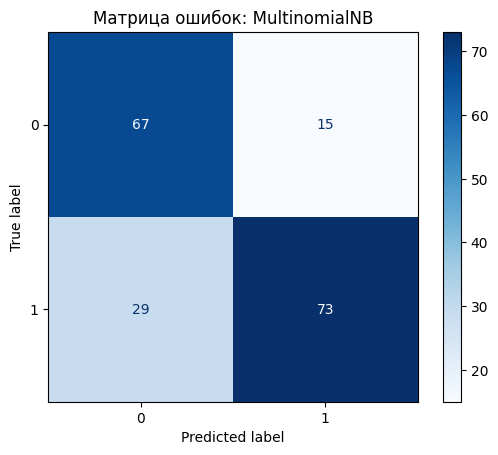

Метрики:
Accuracy: 0.761
Precision: 0.830
Recall: 0.716
F1-score: 0.768
AUC: 0.847


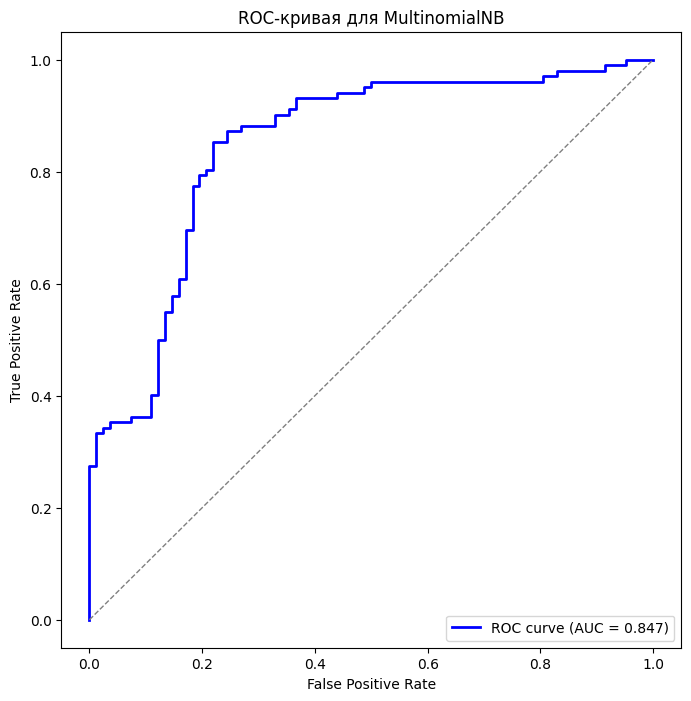

In [80]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

X = df_multinomial.drop('HeartDisease', axis=1)
y = df_multinomial['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

param_grid = {
    'alpha': [0.0, 0.1, 0.5, 1.0],
    'fit_prior': [True, False],
    'class_prior': [None, [0.447, 0.553]],
    'force_alpha': [True, False]
}

mnb = MultinomialNB()
grid_search = GridSearchCV(mnb, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_mnb = grid_search.best_estimator_
print('Лучшие гиперпарамтеры:', grid_search.best_estimator_)

mnb = best_mnb
y_pred = mnb.predict(X_test)
y_prob = best_mnb.predict_proba(X_test)[:, 1]

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_mnb.classes_)
disp.plot(cmap=plot.cm.Blues)
plot.title('Матрица ошибок: MultinomialNB')
plot.show()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Метрики:')
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

print(f'AUC: {roc_auc:.3f}')

plot.figure(figsize=(8,8))
plot.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plot.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
plot.xlabel('False Positive Rate')
plot.ylabel('True Positive Rate')
plot.title('ROC-кривая для MultinomialNB')
plot.legend(loc="lower right")
plot.show()


---

### Анализ результатов
- **Матрица ошибок**: Модель лучше распознаёт здоровых пациентов, чем больных (**FP < FN**; возможно связано с недообучением на больных пациентах);
- **Accuracy**: Модель правильно классифицирует примерно 76% случаев;
- **Precision**: Среди предсказанных положительных случаев большинство действительно положительные;
- **Recall**: Модель пропускает часть положительных случаев - около 28%;
- **F1-score**: Баланс между точностью и полнотой на хорошем уровне;
- **AUC**: Модель хорошо различает классы - высокая способность отделять больных и здоровых пациентов.

Модель работает достаточно эффективно, особенно хорошо контролирует ложноположительные предсказания, но часть больных может быть пропущена (Recall < Precision).

---

## 2. Построение класификационной модели с помощью **Дерева решений**